# ☄ Predicting Hazardous Near-Earth Objects Using Machine Learning

#####    This project analyzes Near-Earth Objects (NEOs) to predict whether an asteroid is potentially hazardous. We explore various features like diameter, velocity, and distance to understand asteroid characteristics.

## 📦 Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Loading the Dataset

In [5]:
df = pd.read_csv('neo.csv')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


## 🔍 Data Overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


## 🗑️ Dropping Irrelevant Columns
##### Some columns like `orbiting_body` and `sentry_object` have only single unique values, making them unhelpful for prediction.

In [9]:
df.drop(['id','name', 'orbiting_body', 'sentry_object'], axis=1,inplace=True)

## 📉 Checking for Missing Values

In [11]:
df.isnull().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

## 📊 Feature Distributions

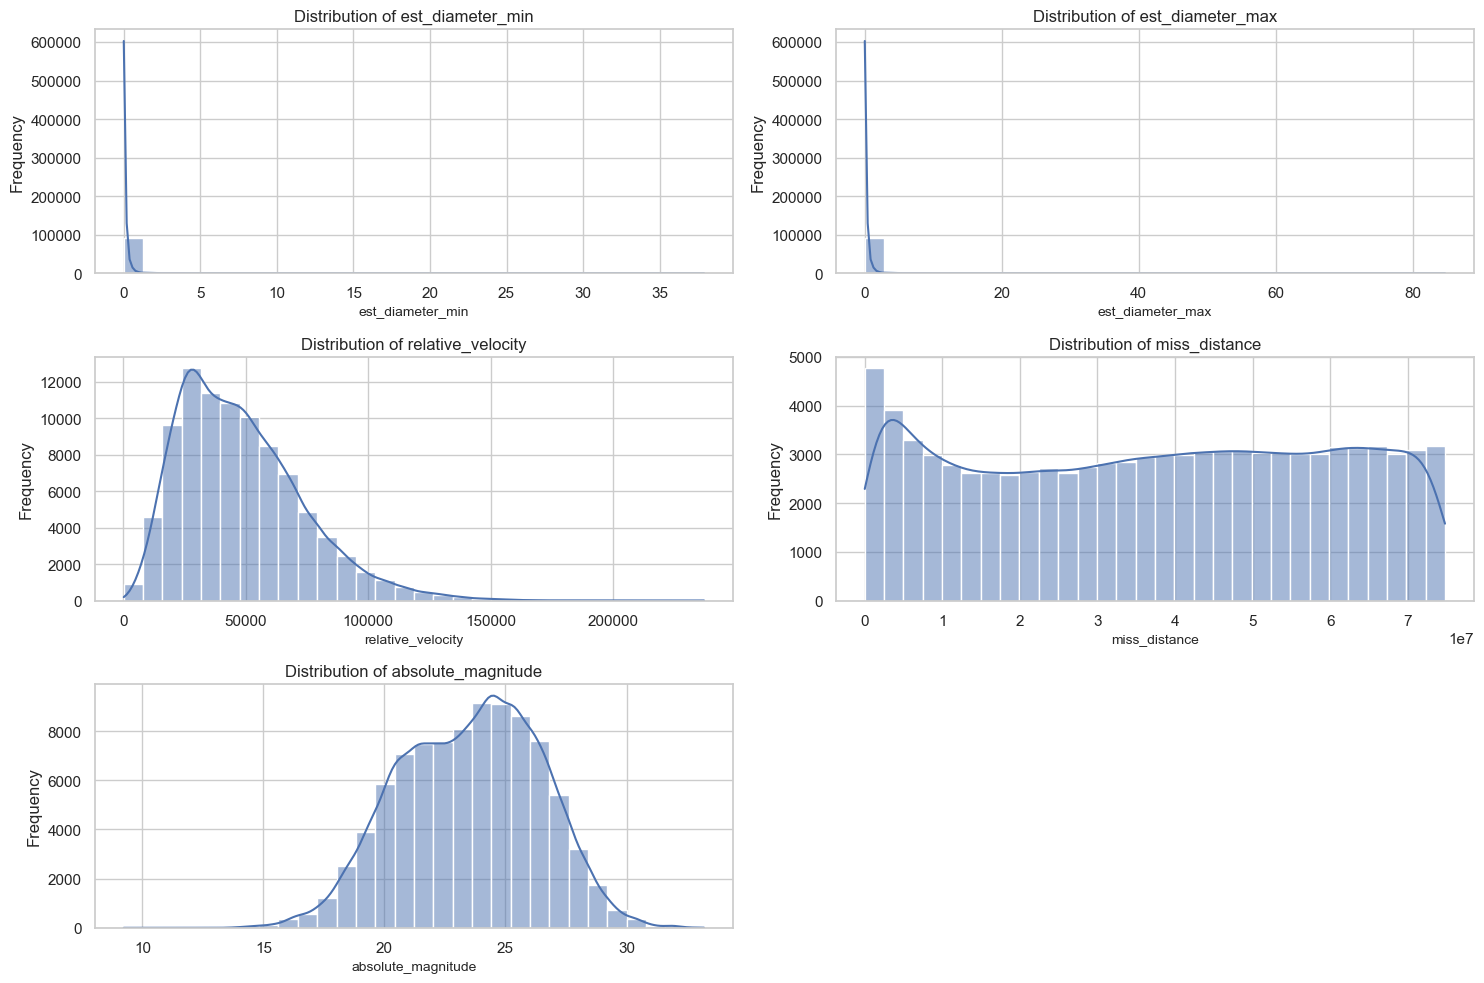

In [13]:
num_cols = ['est_diameter_min', 'est_diameter_max', 'relative_velocity','miss_distance', 'absolute_magnitude']

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

## ⚠️ Class Imbalance in Target Variable

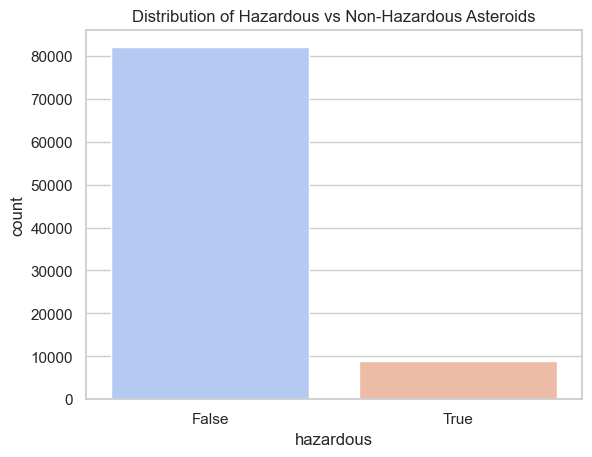

In [15]:
sns.countplot(x=df['hazardous'], palette='coolwarm',hue=df['hazardous'],legend=False)
plt.title('Distribution of Hazardous vs Non-Hazardous Asteroids')
plt.show()

## 🔗 Feature Relationships

In [17]:
#sns.pairplot(df, hue='hazardous', diag_kind='kde')
#plt.show()

## 🔥 Correlation Heatmap

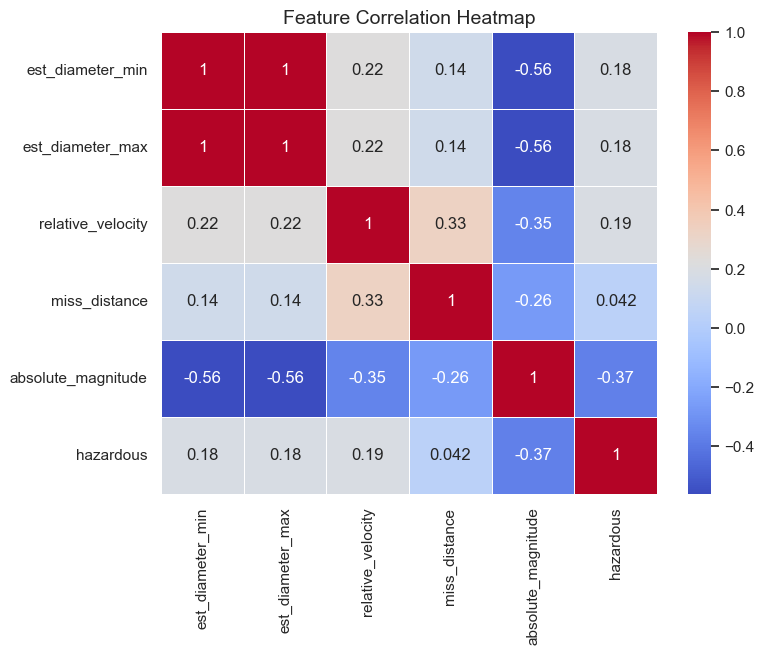

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm",linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

## 🔍 Boxplots for Outlier Detection

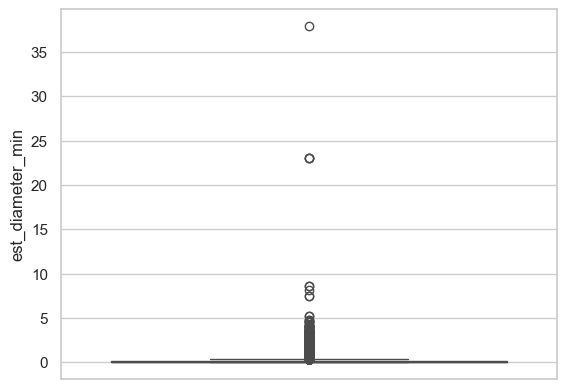

In [21]:
sns.boxplot(y='est_diameter_min',data=df)
plt.show()

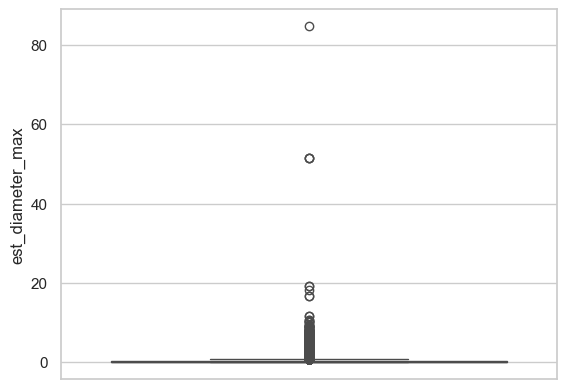

In [22]:
sns.boxplot(y='est_diameter_max',data=df)
plt.show()

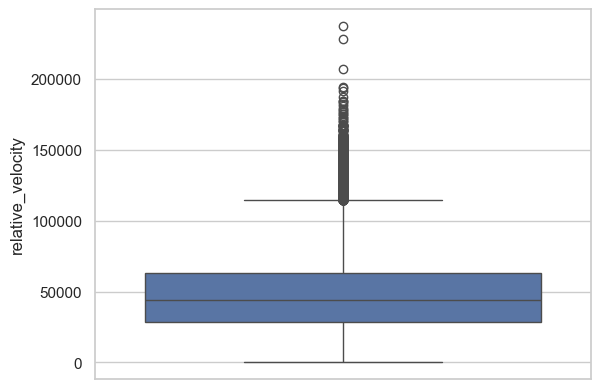

In [23]:
sns.boxplot(y='relative_velocity',data=df)
plt.show()

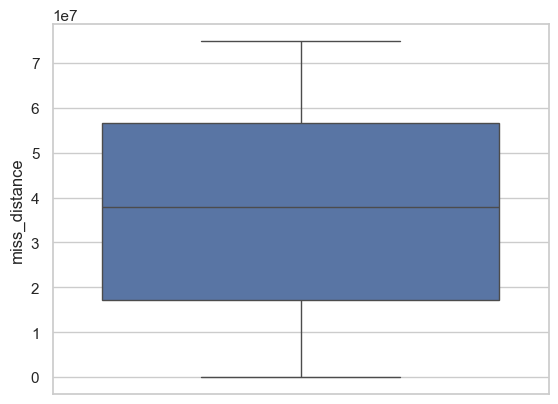

In [24]:
sns.boxplot(y='miss_distance',data=df)
plt.show()

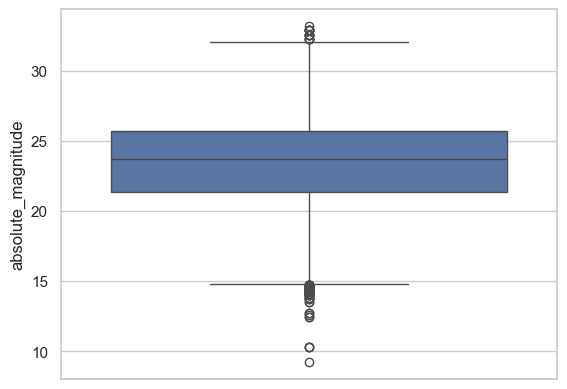

In [25]:
sns.boxplot(y='absolute_magnitude',data=df)
plt.show()

## 📌 Segregating Features and Label


In [27]:
x = df.drop('hazardous', axis=1)
y = df['hazardous']

## 📏 Standardizing Input Features

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

## 📊 Splitting Data into Training and Testing Sets

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

## 📈 Defining Function for Evaluating Model Performance

In [33]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
def performance_evaluation(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Model Accuracy: {accuracy:.2f}')
    print('\nClassification Report:\n',classification_report(y_test, y_pred))
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d',cmap='Blues')

## 🎯 Choosing a Classification Model

### 🌳 Decision Tree Classifier

Model Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.94      0.94     24597
        True       0.46      0.47      0.46      2654

    accuracy                           0.89     27251
   macro avg       0.70      0.70      0.70     27251
weighted avg       0.90      0.89      0.89     27251



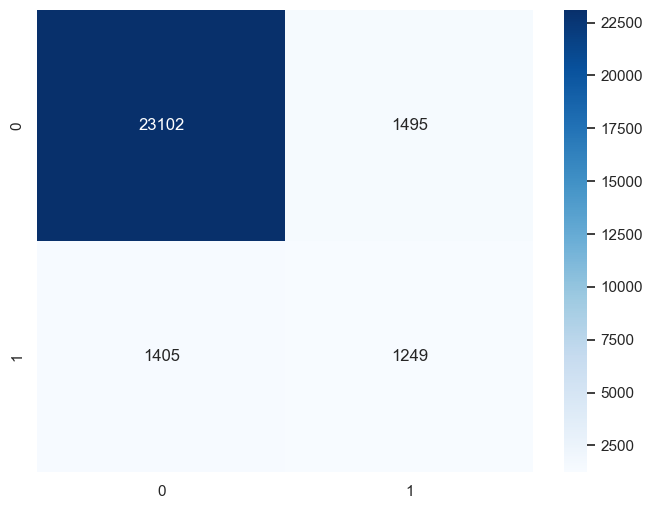

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
performance_evaluation(y_test,y_pred)

### 📉 Logistic Regression

Model Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.95     24597
        True       0.48      0.08      0.14      2654

    accuracy                           0.90     27251
   macro avg       0.69      0.53      0.54     27251
weighted avg       0.87      0.90      0.87     27251



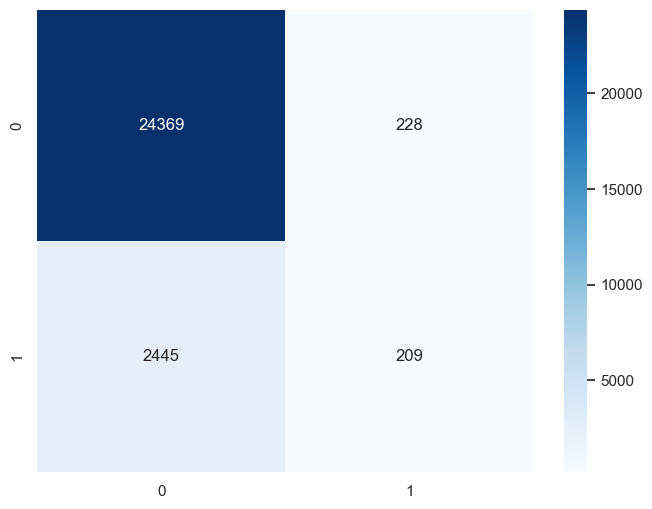

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
performance_evaluation(y_test,y_pred)

### 🌲🌲 Random Forest Classifier

Model Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95     24597
        True       0.61      0.41      0.49      2654

    accuracy                           0.92     27251
   macro avg       0.77      0.69      0.72     27251
weighted avg       0.91      0.92      0.91     27251



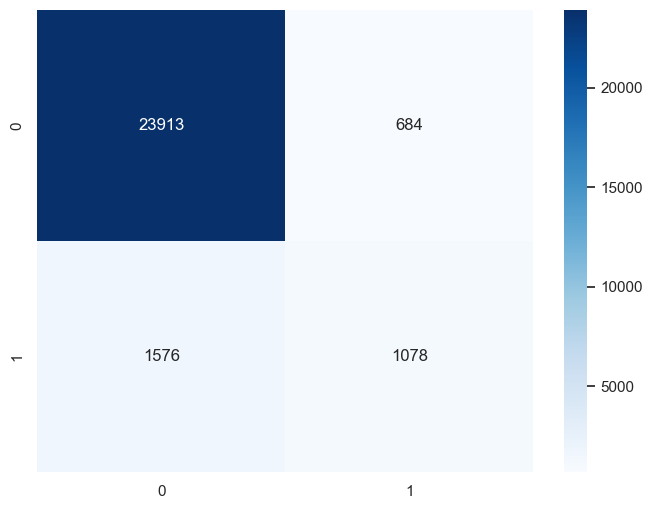

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
performance_evaluation(y_test,y_pred)

##### Random Forest Classifier outpermormed other two models with an overall accuracy of 92 %. Therefore, Random Forest Classifier is choosed for building the model.Yet,the low Recall value for hazardous objects is still a concern

## 🚀 Model Improvement

##### To enhance the reliability of the choosen model further,we can remove potential outliers in the features,handle the class imbalance in the target column and optimize the hyperparameters of the model.

## 📏 Handling Outliers with IQR Capping

In [45]:
columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity','absolute_magnitude']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 

    upper_limit = Q3 + (1.5 * IQR)
    lower_limit = Q1 - (1.5 * IQR)

    print(f'Upper limit of the feature {col} is {upper_limit} and Lower limit is {lower_limit}')

    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit


Upper limit of the feature est_diameter_min is 0.32962154705 and Lower limit is -0.16696411575
Upper limit of the feature est_diameter_max is 0.7370561859 and Lower limit is -0.37334311249999996
Upper limit of the feature relative_velocity is 114380.48061454494 and Lower limit is -22837.85533687105
Upper limit of the feature absolute_magnitude is 32.239999999999995 and Lower limit is 14.8


##### Ouliers that are above the upper limits and below the lower limits are replaced with the values of upper limits and lower limits respectively.

## 📦 Boxplots After Outlier Removal

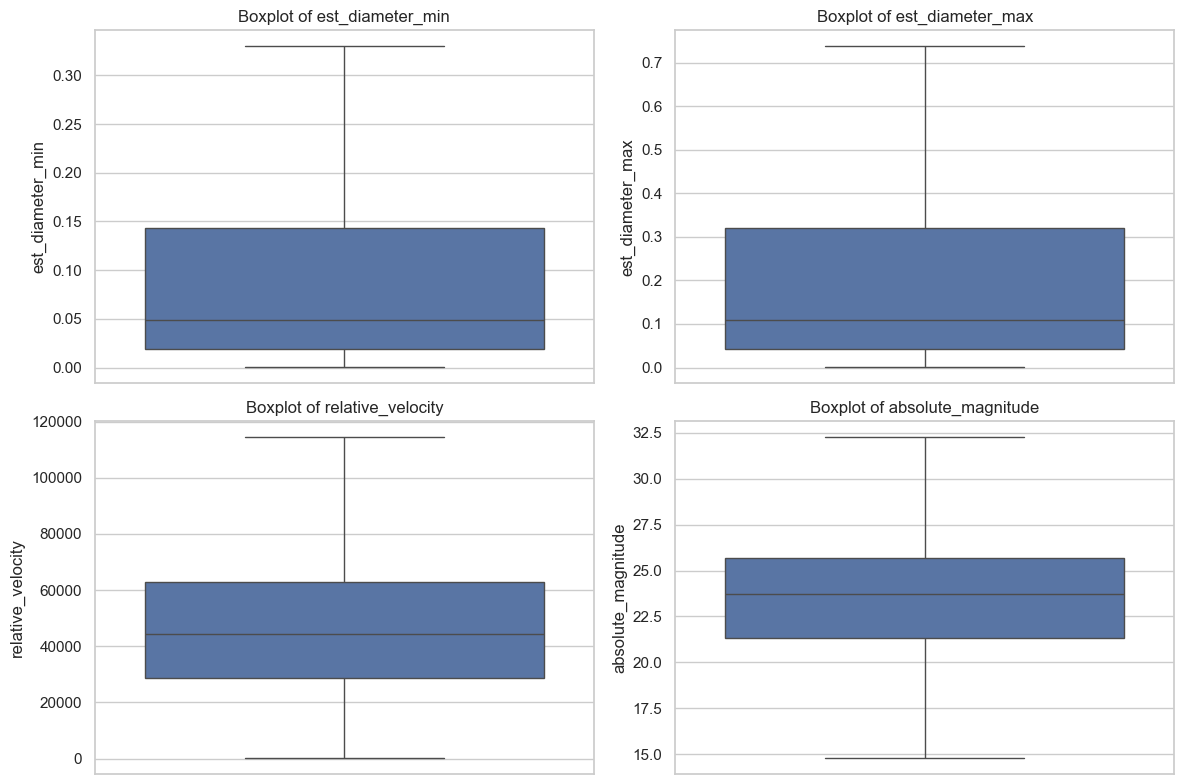

In [48]:
plt.figure(figsize=(12, 8)) 

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  
plt.show()

## 📌 Segregating Features and Label


In [50]:
x = df.drop('hazardous', axis=1)
y = df['hazardous']

## 📏 Standardizing the new Input Features

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

## ⚖ Handling Class Imbalance with Oversampling

In [54]:
from collections import Counter
print("Before Performing Oversampling",Counter(y))

Before Performing Oversampling Counter({False: 81996, True: 8840})


In [55]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [56]:
x,y=smote.fit_resample(x,y)
print("After Performing Oversampling",Counter(y))

After Performing Oversampling Counter({False: 81996, True: 81996})


##### The Data is now balanced to get more accurate predictions

## 📊 Splitting Data into Training and Testing Sets

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

## ⚙ Tuning Hyperparameters For Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42,n_jobs=-1)

param_dist = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=3,  
    scoring='accuracy',
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [62]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


## 🔮 Predicting Labels with Improved Model

In [64]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

## 📊 Performance Evaluation of the Improved Model

Model Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.91      0.94     24543
        True       0.92      0.97      0.94     24655

    accuracy                           0.94     49198
   macro avg       0.94      0.94      0.94     49198
weighted avg       0.94      0.94      0.94     49198



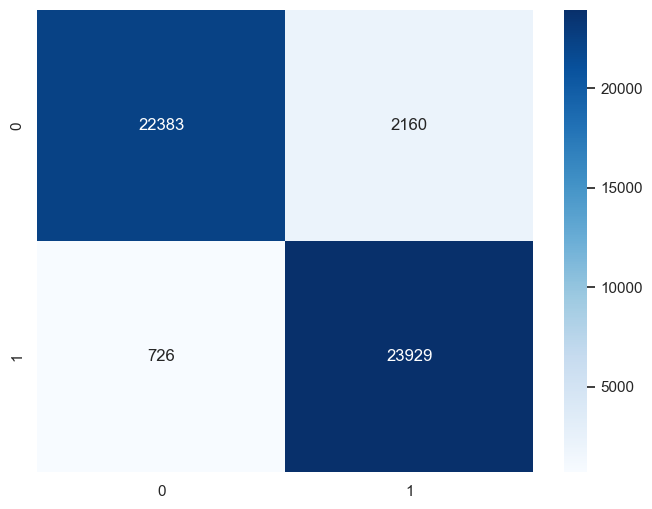

In [66]:
performance_evaluation(y_test,y_pred)

#####  After handling class imbalance and outliers and also tuning the hyperparameters for the Random Forest Classifier,the overall accuracy of the model has been improved from 92 % to 94 % and the Recall for hazardous objects has been significantly improved from 42 % to 97 %.